<a href="https://colab.research.google.com/github/LenaVolzhina/colab/blob/main/eratosphenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cos-sin день в году

In [ ]:
import numpy as np

days = np.tile(np.arange(365), 2)

In [ ]:
days.shape

(730,)

In [ ]:
days_sin = np.sin(2 * np.pi * days / 366.)
days_cos = np.cos(2 * np.pi * days / 366.)

In [ ]:
import matplotlib.pyplot as plt

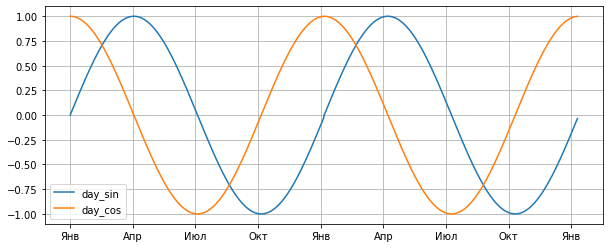

In [ ]:
plt.figure(figsize=(10, 4))

plt.plot(np.arange(days.shape[0]), days_sin, label='day_sin')
plt.plot(np.arange(days.shape[0]), days_cos, label='day_cos')
plt.grid()
plt.xticks(np.arange(0, days.shape[0], 90), labels=['Янв', 'Апр', 'Июл', 'Окт'] * 10)
plt.legend()

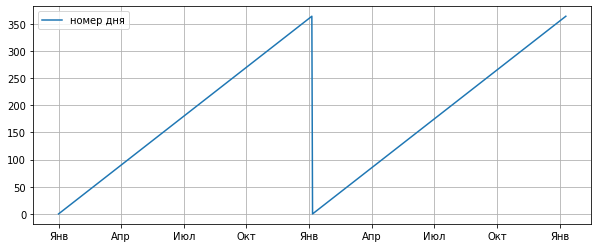

In [ ]:
plt.figure(figsize=(10, 4))

plt.plot(np.arange(days.shape[0]), days, label='номер дня')
plt.grid()
plt.xticks(np.arange(0, days.shape[0], 90), labels=['Янв', 'Апр', 'Июл', 'Окт'] * 10)
plt.legend()

# Сглаживание станций

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/data/eratosphenes.npz', 'rb') as f:
  data = np.load(f)

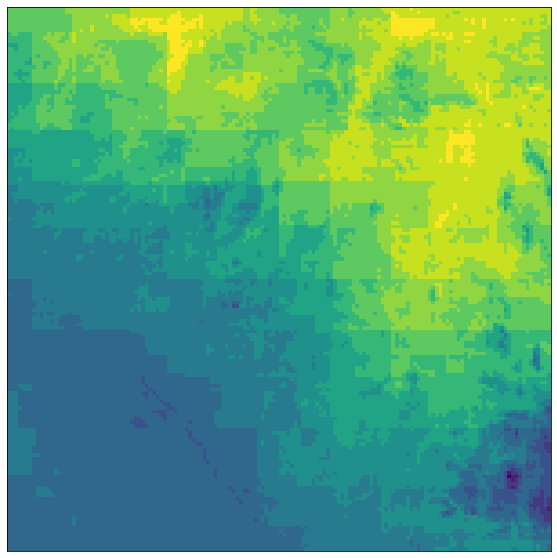

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(data)
plt.tick_params(
    axis='both', which='both',
    bottom=False, top=False, left=False, right=False,
    labelbottom=False, labeltop=False, labelleft=False, labelright=False,
)

In [ ]:
data.mean()

30.216133

In [ ]:
d = 30
circle = np.zeros((d, d))
xs, ys = np.tile(np.arange(d), d).reshape((d, d)), np.repeat(np.arange(d), d).reshape((d, d))
distance_from_center = np.sqrt((xs - d / 2) ** 2 + (ys - d / 2) ** 2)
circle[distance_from_center < (d / 2)] = 1

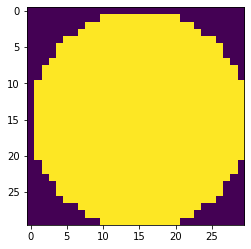

In [ ]:
plt.imshow(circle)

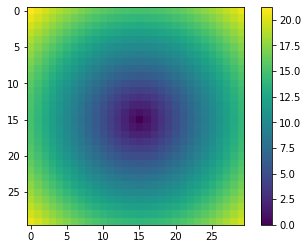

In [ ]:
plt.imshow(distance_from_center)
plt.colorbar()

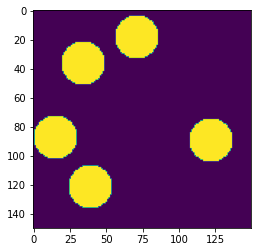

In [ ]:
np.random.seed(3)

data_circles = np.zeros(data.shape)
data_distance_from_center = np.full(data.shape, -1.)
# np.fill(data_distance_from_center, -1)

for _ in range(5):
    rand_x, rand_y = np.random.randint(data.shape[0] - d), np.random.randint(data.shape[1] - d)
    data_circles[rand_x:rand_x + d, rand_y: rand_y + d] += circle
    data_distance_from_center[rand_x:rand_x + d, rand_y: rand_y + d] += distance_from_center + 1e-6

plt.imshow(data_circles)

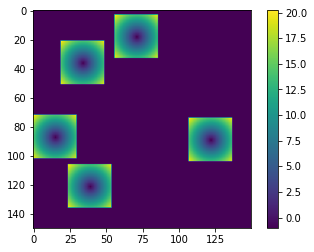

In [ ]:
plt.imshow(data_distance_from_center)
plt.colorbar()

# Данные с кругами

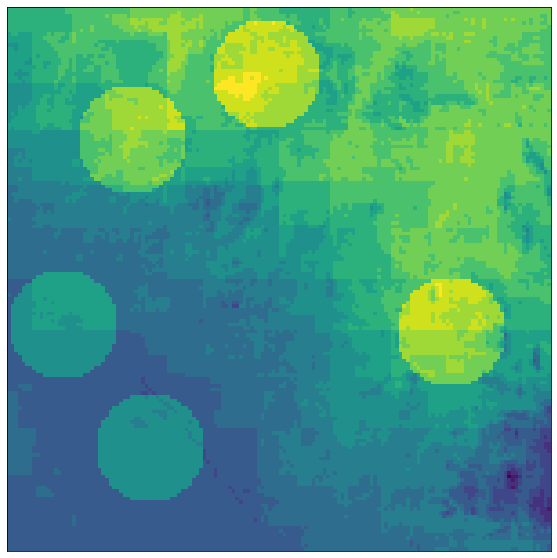

In [ ]:
plt.figure(figsize=(10, 10))
plt.tick_params(
    axis='both', which='both',
    bottom=False, top=False, left=False, right=False,
    labelbottom=False, labeltop=False, labelleft=False, labelright=False,
)

plt.imshow(data + data_circles * 3)

# Сглаживание

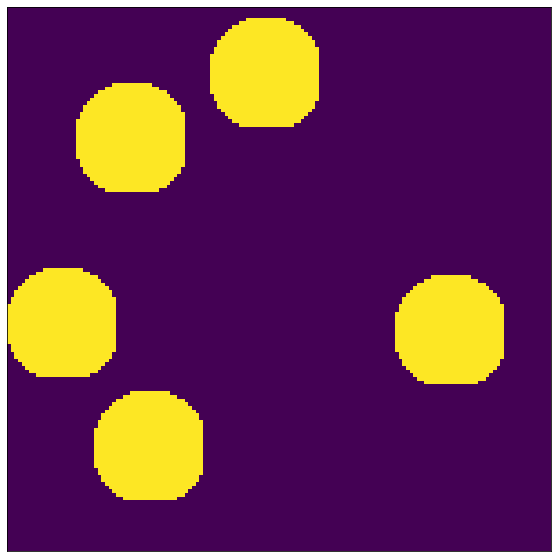

In [ ]:
plt.figure(figsize=(10, 10))
plt.tick_params(
    axis='both', which='both',
    bottom=False, top=False, left=False, right=False,
    labelbottom=False, labeltop=False, labelleft=False, labelright=False,
)

m = np.logical_and(-1 < data_distance_from_center, data_distance_from_center < d / 2)
plt.imshow(m)

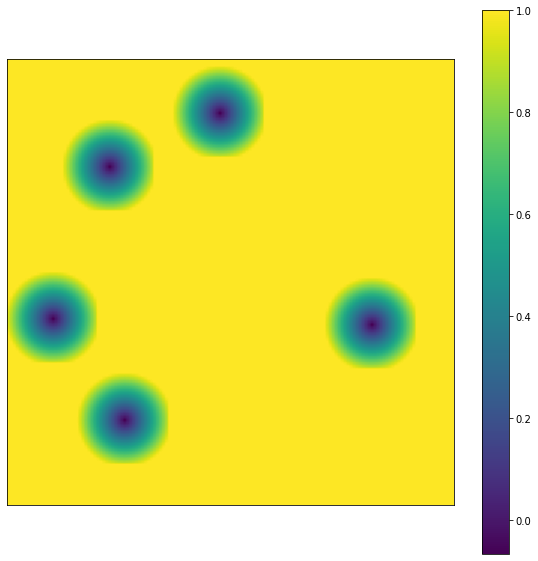

In [ ]:
# debug
plt.figure(figsize=(10, 10))
plt.tick_params(
    axis='both', which='both',
    bottom=False, top=False, left=False, right=False,
    labelbottom=False, labeltop=False, labelleft=False, labelright=False,
)

plt.imshow(np.where(m, data_distance_from_center / d * 2, 1))
plt.colorbar()

In [ ]:
d1 = data_distance_from_center / (d / 2)
d1[~m] = 1

data_circles_new = data.copy()
data_circles_new[m] = (d1 * data + (1. - d1) * (data + 3 * data_circles))[m]

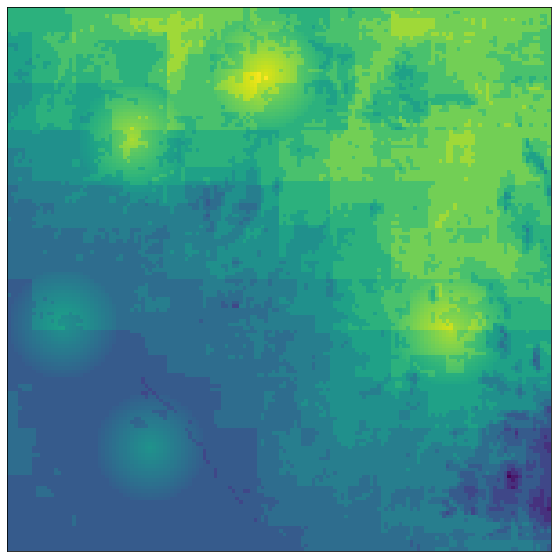

In [ ]:
plt.figure(figsize=(10, 10))
plt.tick_params(
    axis='both', which='both',
    bottom=False, top=False, left=False, right=False,
    labelbottom=False, labeltop=False, labelleft=False, labelright=False,
)

plt.imshow(data_circles_new)
# plt.colorbar()